In [2]:
import pandas as pd
import numpy as np
 
    

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
plt.style.use('fivethirtyeight')
    
from scipy.stats import shapiro
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols


In [4]:
df_merge = pd.read_csv("/home/piai/Downloads/final_merged_dataset.csv")
df_merge.columns

Index(['No_Die', 'Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'Lot_Num', 'Wafer_Num',
       'Datetime', 'count_oxid', 'photo_soft_Chamber', 'process 2',
       'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
       'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3',
       'photoresist_bake', 'temp_softbake', 'time_softbake', 'count_soft',
       'lithography_Chamber', 'Process 2-1', 'Line_CD', 'UV_type',
       'Wavelength', 'Resolution', 'Energy_Exposure', 'count_litho',
       'Etching_Chamber', 'Process 3', 'Thin F4', 'Thin F3', 'Thin F2',
       'Thin F1', 'Temp_Etching', 'Source_Power', 'Selectivity',
       'count_etching', 'Chamber_Num', 'process4', 'Flux60s', 'Flux90s',
       'Flux160s', 'Flux480s', 'Flux840s', 'input_Energy', 'Temp_implantation',
       'Furance_Temp', 'RTA_Temp', 'count_ion', 'Target', 'Error_message',
       'Wafer_map', 'chamber_total_count', 'chamber_path', 'defective',
 

In [5]:
#ols 사피로 N2-HMDS
fit = ols('defective ~ N2_HMDS', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)



0.28969091176986694 
 0.0


In [6]:
#사피로 모델 이용
shapiro(df_merge['N2_HMDS'])
statistic, p = stats.shapiro(df_merge['N2_HMDS'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)

Shapiro-Wilk Test: statistic=0.9870252013206482, p-value=4.770016673316668e-11
0.0000000000


(array([  3.,   0.,   6.,   8.,  34.,  15.,  14.,  16.,  55.,  27.,  36.,
         47.,  74.,  32.,  63.,  59.,  96.,  74., 136., 133., 165., 100.,
        128.,  54.,  30.,  25.,  62.,  43.,  18.,  37.,  23.,  36.,   6.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 9.497 ,  9.8489, 10.2008, 10.5527, 10.9046, 11.2565, 11.6084,
        11.9603, 12.3122, 12.6641, 13.016 , 13.3679, 13.7198, 14.0717,
        14.4236, 14.7755, 15.1274, 15.4793, 15.8312, 16.1831, 16.535 ,
        16.8869, 17.2388, 17.5907, 17.9426, 18.2945, 18.6464, 18.9983,
        19.3502, 19.7021, 20.054 , 20.4059, 20.7578, 21.1097, 21.4616,
        21.8135, 22.1654, 22.5173, 22.8692, 23.2211, 23.573 ]),
 <BarContainer object of 40 artists>)

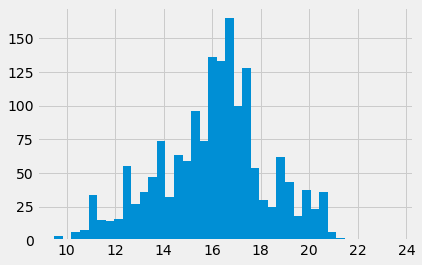

In [7]:
#정규성 bin수를 늘려보니 정규성 안 나옴
plt.hist(df_merge['N2_HMDS'],bins = 40)


In [8]:
fit = ols('defective ~ pressure_HMDS', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)

0.2869037389755249 
 0.0


In [9]:

shapiro(df_merge['pressure_HMDS'])
statistic, p = stats.shapiro(df_merge['pressure_HMDS'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)

Shapiro-Wilk Test: statistic=0.9983168840408325, p-value=0.09428383409976959
0.0942838341


(array([  6.,   4.,   6.,   8.,   4.,  16.,  16.,  16.,  24.,  41.,  60.,
         75.,  79.,  67., 120., 103.,  87.,  99.,  89., 120., 102.,  77.,
         87.,  58.,  70.,  59.,  57.,  32.,  18.,  13.,  15.,   4.,   8.,
          8.,   6.,   2.,   0.,   0.,   0.,   2.]),
 array([14.776   , 14.788625, 14.80125 , 14.813875, 14.8265  , 14.839125,
        14.85175 , 14.864375, 14.877   , 14.889625, 14.90225 , 14.914875,
        14.9275  , 14.940125, 14.95275 , 14.965375, 14.978   , 14.990625,
        15.00325 , 15.015875, 15.0285  , 15.041125, 15.05375 , 15.066375,
        15.079   , 15.091625, 15.10425 , 15.116875, 15.1295  , 15.142125,
        15.15475 , 15.167375, 15.18    , 15.192625, 15.20525 , 15.217875,
        15.2305  , 15.243125, 15.25575 , 15.268375, 15.281   ]),
 <BarContainer object of 40 artists>)

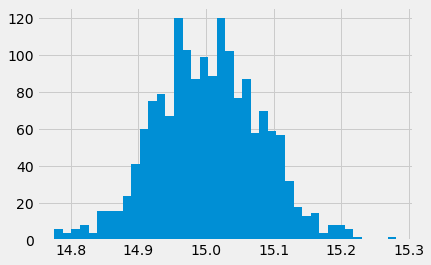

In [10]:

#정규성 bin수를 늘려보니 정규성 안 나옴
plt.hist(df_merge['pressure_HMDS'],bins = 40)

In [11]:




fit = ols('defective ~ temp_HMDS', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)

0.30673760175704956 
 0.0


In [12]:


shapiro(df_merge['temp_HMDS'])
statistic, p = stats.shapiro(df_merge['temp_HMDS'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)

Shapiro-Wilk Test: statistic=0.988737165927887, p-value=4.779187046111133e-10
0.0000000005


(array([  2.,   0.,   0.,   2.,   4.,   0.,  16.,  11.,   0.,  12.,  23.,
          0.,  67., 113.,   0.,  76., 164.,   0., 149., 164.,   0., 175.,
          0., 202., 129.,   0., 138.,  91.,   0.,  58.,  29.,   0.,  13.,
          2.,   0.,   6.,   6.,   0.,   2.,   4.]),
 array([19.986  , 19.98665, 19.9873 , 19.98795, 19.9886 , 19.98925,
        19.9899 , 19.99055, 19.9912 , 19.99185, 19.9925 , 19.99315,
        19.9938 , 19.99445, 19.9951 , 19.99575, 19.9964 , 19.99705,
        19.9977 , 19.99835, 19.999  , 19.99965, 20.0003 , 20.00095,
        20.0016 , 20.00225, 20.0029 , 20.00355, 20.0042 , 20.00485,
        20.0055 , 20.00615, 20.0068 , 20.00745, 20.0081 , 20.00875,
        20.0094 , 20.01005, 20.0107 , 20.01135, 20.012  ]),
 <BarContainer object of 40 artists>)

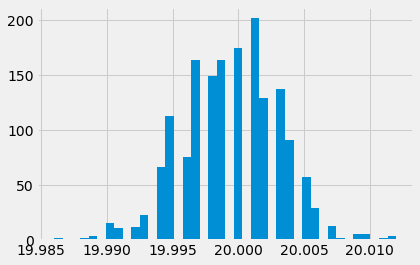

In [13]:
plt.hist(df_merge['temp_HMDS'],bins = 40)


In [15]:




fit = ols('defective ~ temp_HMDS_bake', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)


0.35139501094818115 
 0.0


In [16]:


shapiro(df_merge['temp_HMDS_bake'])
statistic, p = stats.shapiro(df_merge['temp_HMDS_bake'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)


Shapiro-Wilk Test: statistic=0.9929490089416504, p-value=4.0374993659497704e-07
0.0000004037


(array([  2.,   0.,   0.,   2.,   3.,   4.,  10.,  17.,  15.,  37.,  19.,
         43.,  36.,  74., 112.,  71.,  80.,  84.,  92.,  79., 105., 100.,
         57.,  94.,  90.,  73.,  80.,  64.,  73.,  50.,  34.,  25.,  18.,
          4.,   5.,   2.,   2.,   0.,   0.,   2.]),
 array([191.209 , 191.6668, 192.1246, 192.5824, 193.0402, 193.498 ,
        193.9558, 194.4136, 194.8714, 195.3292, 195.787 , 196.2448,
        196.7026, 197.1604, 197.6182, 198.076 , 198.5338, 198.9916,
        199.4494, 199.9072, 200.365 , 200.8228, 201.2806, 201.7384,
        202.1962, 202.654 , 203.1118, 203.5696, 204.0274, 204.4852,
        204.943 , 205.4008, 205.8586, 206.3164, 206.7742, 207.232 ,
        207.6898, 208.1476, 208.6054, 209.0632, 209.521 ]),
 <BarContainer object of 40 artists>)

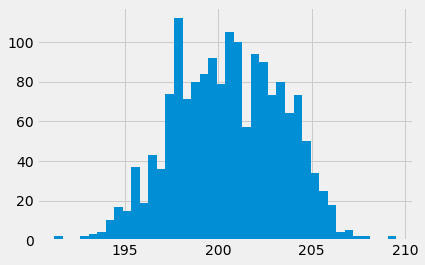

In [14]:
plt.hist(df_merge['temp_HMDS_bake'],bins = 40)


In [ ]:

fit = ols('defective ~ time_HMDS_bake', data=df_merge).fit()

sqrt_mse = 
np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)


In [ ]:


shapiro(df_merge['time_HMDS_bake'])
statistic, p = stats.shapiro(df_merge['time_HMDS_bake'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)


(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0., 318.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 861.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 411.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  36.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([89.998   , 89.998125, 89.99825 , 89.998375, 89.9985  , 89.998625,
        89.99875 , 89.998875, 89.999   , 89.999125, 89.99925 , 89.999375,
        89.9995  , 89.999625, 89.99975 , 89.999875, 90.      , 90.000125,
        90.00025 , 90.000375, 90.0005  , 90.000625, 90.00075 , 90.000875,
        90.001   , 90.001125, 90.00125 , 90.001375, 90.0015  , 90.001625,
        90.00175 , 90.001875, 90.002   , 90.002125, 90.00225 , 90.002375,
        90.0025  , 90.002625, 90.00275 , 90.002875, 90.003   ]),
 <BarContainer object of 40 artists>)

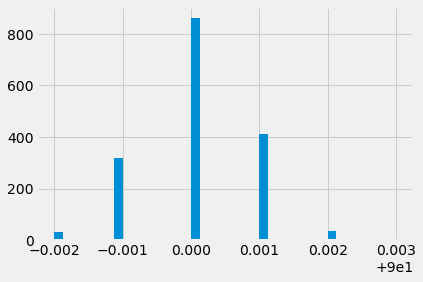

In [17]:
plt.hist(df_merge['time_HMDS_bake'],bins = 40)


In [19]:

fit = ols('defective ~ photoresist_bake', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)

0.3810195326805115 
 0.0


In [20]:
shapiro(df_merge['photoresist_bake'])
statistic, p = stats.shapiro(df_merge['photoresist_bake'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)


Shapiro-Wilk Test: statistic=0.9926783442497253, p-value=2.4689785504961037e-07
0.0000002469


(array([  2.,   0.,   0.,   0.,   0.,   4.,   2.,   6.,  12.,  24.,  32.,
         27.,  34.,  60.,  66.,  65.,  60.,  65., 104.,  74., 117., 111.,
        120.,  94.,  91.,  94.,  68.,  86.,  81.,  67.,  38.,  22.,  14.,
          6.,   4.,   4.,   2.,   0.,   0.,   2.]),
 array([4.765  , 4.77685, 4.7887 , 4.80055, 4.8124 , 4.82425, 4.8361 ,
        4.84795, 4.8598 , 4.87165, 4.8835 , 4.89535, 4.9072 , 4.91905,
        4.9309 , 4.94275, 4.9546 , 4.96645, 4.9783 , 4.99015, 5.002  ,
        5.01385, 5.0257 , 5.03755, 5.0494 , 5.06125, 5.0731 , 5.08495,
        5.0968 , 5.10865, 5.1205 , 5.13235, 5.1442 , 5.15605, 5.1679 ,
        5.17975, 5.1916 , 5.20345, 5.2153 , 5.22715, 5.239  ]),
 <BarContainer object of 40 artists>)

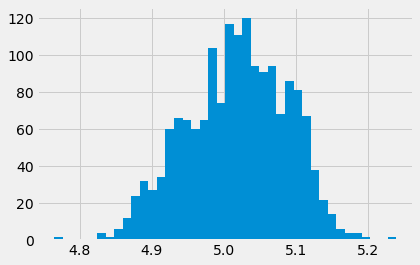

In [18]:
plt.hist(df_merge['photoresist_bake'],bins = 40)
#우편향

In [21]:
fit = ols('defective ~ temp_softbake', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)

0.39236950874328613 
 0.0


In [22]:
shapiro(df_merge['temp_softbake'])
statistic, p = stats.shapiro(df_merge['temp_softbake'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)


Shapiro-Wilk Test: statistic=0.9921973943710327, p-value=1.0548087203687828e-07
0.0000001055


(array([  2.,   0.,   0.,   0.,   0.,   0.,   2.,  10.,  16.,  13.,  24.,
         32.,  33.,  70.,  42.,  54.,  44.,  70.,  76., 104., 128., 129.,
        117., 110., 114.,  74., 101., 104.,  72.,  28.,  24.,  21.,  22.,
          0.,   6.,   4.,   6.,   0.,   4.,   2.]),
 array([86.498   , 86.751875, 87.00575 , 87.259625, 87.5135  , 87.767375,
        88.02125 , 88.275125, 88.529   , 88.782875, 89.03675 , 89.290625,
        89.5445  , 89.798375, 90.05225 , 90.306125, 90.56    , 90.813875,
        91.06775 , 91.321625, 91.5755  , 91.829375, 92.08325 , 92.337125,
        92.591   , 92.844875, 93.09875 , 93.352625, 93.6065  , 93.860375,
        94.11425 , 94.368125, 94.622   , 94.875875, 95.12975 , 95.383625,
        95.6375  , 95.891375, 96.14525 , 96.399125, 96.653   ]),
 <BarContainer object of 40 artists>)

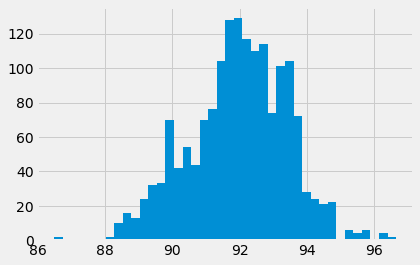

In [23]:
plt.hist(df_merge['temp_softbake'],bins = 40)

In [27]:
fit = ols('defective ~ time_softbake', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)

0.3031502366065979 
 0.0


In [25]:
shapiro(df_merge['time_softbake'])
statistic, p = stats.shapiro(df_merge['time_softbake'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)

Shapiro-Wilk Test: statistic=0.9957526922225952, p-value=0.00012953615805599838
0.0001295362


(array([  4.,   2.,   5.,   5.,   7.,  21.,  24.,  34.,  30.,  24.,  44.,
         59.,  65.,  77., 105.,  88., 106.,  93., 110., 108., 104.,  90.,
        115.,  80.,  45.,  27.,  40.,  42.,  43.,  15.,  15.,  18.,   3.,
          5.,   3.,   0.,   0.,   0.,   0.,   2.]),
 array([29.982   , 29.983025, 29.98405 , 29.985075, 29.9861  , 29.987125,
        29.98815 , 29.989175, 29.9902  , 29.991225, 29.99225 , 29.993275,
        29.9943  , 29.995325, 29.99635 , 29.997375, 29.9984  , 29.999425,
        30.00045 , 30.001475, 30.0025  , 30.003525, 30.00455 , 30.005575,
        30.0066  , 30.007625, 30.00865 , 30.009675, 30.0107  , 30.011725,
        30.01275 , 30.013775, 30.0148  , 30.015825, 30.01685 , 30.017875,
        30.0189  , 30.019925, 30.02095 , 30.021975, 30.023   ]),
 <BarContainer object of 40 artists>)

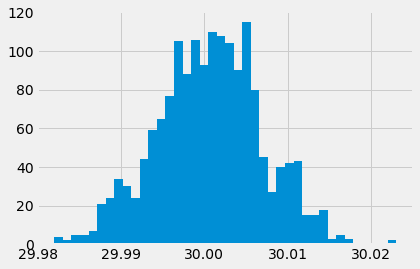

In [26]:
plt.hist(df_merge['time_softbake'],bins = 40)

In [31]:
fit = ols('defective ~ time_softbake', data=df_merge).fit()

sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

shapiro_test = stats.shapiro(std_res)

sw_stat = shapiro_test[0]
p_value = shapiro_test[1]
print(sw_stat,'\n' ,p_value)

0.3031502366065979 
 0.0


In [32]:
shapiro(df_merge['time_softbake'])
statistic, p = stats.shapiro(df_merge['time_softbake'])
print('Shapiro-Wilk Test: statistic={}, p-value={}'.format(statistic,p))
p = '{:.10f}'.format(p)
print(p)

Shapiro-Wilk Test: statistic=0.9957526922225952, p-value=0.00012953615805599838
0.0001295362


(array([  4.,   2.,   5.,   5.,   7.,  21.,  24.,  34.,  30.,  24.,  44.,
         59.,  65.,  77., 105.,  88., 106.,  93., 110., 108., 104.,  90.,
        115.,  80.,  45.,  27.,  40.,  42.,  43.,  15.,  15.,  18.,   3.,
          5.,   3.,   0.,   0.,   0.,   0.,   2.]),
 array([29.982   , 29.983025, 29.98405 , 29.985075, 29.9861  , 29.987125,
        29.98815 , 29.989175, 29.9902  , 29.991225, 29.99225 , 29.993275,
        29.9943  , 29.995325, 29.99635 , 29.997375, 29.9984  , 29.999425,
        30.00045 , 30.001475, 30.0025  , 30.003525, 30.00455 , 30.005575,
        30.0066  , 30.007625, 30.00865 , 30.009675, 30.0107  , 30.011725,
        30.01275 , 30.013775, 30.0148  , 30.015825, 30.01685 , 30.017875,
        30.0189  , 30.019925, 30.02095 , 30.021975, 30.023   ]),
 <BarContainer object of 40 artists>)

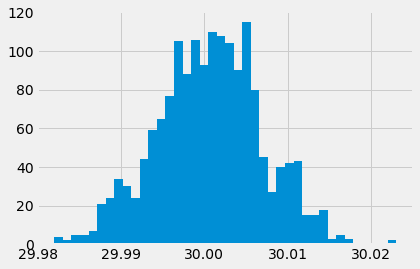

In [33]:
plt.hist(df_merge['time_softbake'],bins = 40)

In [34]:
Photo_softbake:['N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
       'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3',
       'photoresist_bake', 'temp_softbake', 'time_softbake']
    #순 11개